## テンプレートマッチング NCC

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

def Template_matching_NCC(img, tmp):
    H,W,C = img.shape
    Ht,Wt,Ct = tmp.shape
    
    i, j = -1, -1
    v = -1
    
    for y in range(H-Ht):
        for x in range(W-Wt):
            _v = np.sum(img[y:y+Ht, x:x+Wt]*tmp) / (np.sqrt(np.sum(img[y:y+Ht, x:x+Wt]**2)) * np.sqrt(np.sum(tmp**2)))
            
            if _v > v:
                v = _v
                i, j = x, y
                
    out = img.copy()
    cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
    out = out.astype(np.uint8)
    
    print(v)
    
    return out

0.997127


True

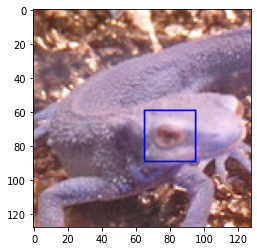

In [10]:
img = cv2.imread('../imori.jpg').astype(np.float32)
tmp = cv2.imread('../imori_part.jpg').astype(np.float32)
# ここでfloatを指定し忘れるとrectangleがずれる

out = Template_matching_NCC(img, tmp)

plt.imshow(out)
cv2.imwrite('out56.jpg', out)

True

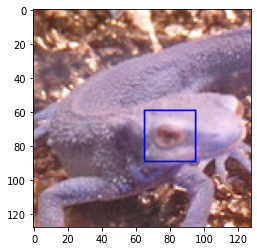

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# template matching
def Template_matching(img, template):
    # get original image shape
    H, W, C = img.shape

    # get template image shape
    Ht, Wt, Ct = template.shape

    # Templete matching
    # prepare x, y index
    i, j = -1, -1
    # prepare evaluate value
    v = -1

    for y in range(H - Ht):
        for x in range(W - Wt):
            # get NCC value
            # get numerator of NCC
            _v = np.sum(img[y : y + Ht, x : x + Wt] * template)
            # devided numerator
            _v /= (np.sqrt(np.sum(img[y : y + Ht, x : x + Wt] ** 2)) * np.sqrt(np.sum(template ** 2)))

            # if NCC is max
            if _v > v:
                v = _v
                i, j = x, y

    out = img.copy()
    # draw rectangle
    cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
    out = out.astype(np.uint8)

    return out

# Read image
img = cv2.imread("../imori.jpg").astype(np.float32)

# Read templete image
template = cv2.imread("../imori_part.jpg").astype(np.float32)

# Template matching
out = Template_matching(img, template)
                

plt.imshow(out)
cv2.imwrite('out56.jpg', out)